In [1]:
%pip install -q git+https://github.com/huggingface/peft.git transformers bitsandbytes datasets


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import Blip2ForConditionalGeneration, AutoProcessor
from peft import PeftModel, PeftConfig
from PIL import Image
import torch

peft_model_id = "shaikhadil26/blip2-opt-2.7b-image-description-v2"

config = PeftConfig.from_pretrained(peft_model_id)

model = Blip2ForConditionalGeneration.from_pretrained(config.base_model_name_or_path, device_map="mps")
model = PeftModel.from_pretrained(model, peft_model_id)

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")

In [ ]:
device = 'mps'

def generate_cap(img):
    inputs = processor(images=img, return_tensors="pt").to(device, torch.float16) 
    pixel_values = inputs.pixel_values

    generated_ids = model.generate(pixel_values=pixel_values, max_length=150)
    generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_caption

In [ ]:
import requests

url = "https://i.pinimg.com/736x/26/db/8e/26db8e1bc9a0eb238e69ae7d01a24fee.jpg"
img = Image.open(requests.get(url, stream=True).raw)

generate_cap(img)

'The image is a drawing of Snoop Dogg, a rapper and actor. He is shown with a long braided hairstyle and a beard. He is wearing a black shirt and has a gold chain around his neck. The drawing is in black and white and has a cartoonish style. The background is white. The drawing is in the style of a cartoon and is not realistic.'

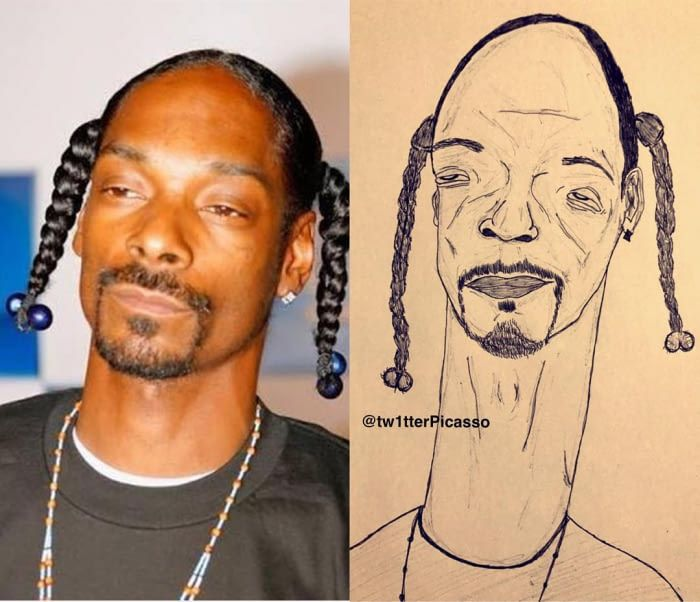

In [8]:
img

'The image is a drawing of Snoop Dogg, a rapper and actor. He is shown with a long braided hairstyle and a beard. He is wearing a black shirt and has a gold chain around his neck. The drawing is in black and white and has a cartoonish style. The background is white. The drawing is in the style of a cartoon and is not realistic.'